In [1]:
#part 2 test

In [2]:
#load and transform images

In [9]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
import torch.nn.functional as F

In [4]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

                               #transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))])
training_dataset = datasets.MNIST(root = './data', train = True, download = True, transform = transform)
training_loader = torch.utils.data.DataLoader(dataset = training_dataset, batch_size = 100, shuffle = True)

In [5]:
# change the tensors back to numpy array to plot the images

In [6]:
#orginal
def img_convert(tensor):
    image = tensor.clone().detach().numpy()  # Convert tensor to numpy array
    image = image.transpose(1, 2, 0)  # Change shape from [1, 28, 28] to [28, 28, 1]   
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))  # Undo normalization
    image = image.clip(0, 1)  # Clip values to ensure they are between 0 and 1
    return image

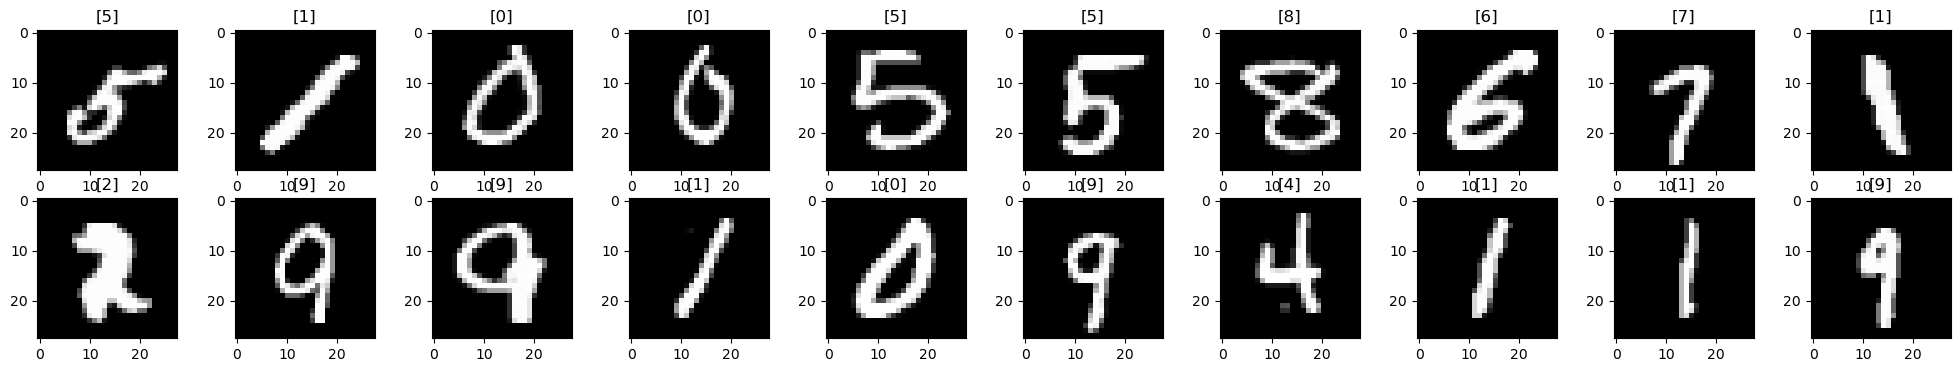

In [7]:
dataiter = iter(training_loader)
images, labels = next(dataiter)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1) #xticks = [], yticks = [])
    plt.imshow(img_convert(images[idx]))
    ax.set_title([labels[idx].item()])
    

In [11]:
class Classifier(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super().__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
        
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x) #get the raw output of your network
        #scores matter when calculating the cross entropy loss of a multiclass dataset
        return x       

In [12]:
model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [13]:
#9:28